In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/who_suicide_statistics.csv')
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [3]:
df.shape

(43776, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
df.dropna(inplace=True)

In [17]:
s1 = df.groupby(['year'])['suicides_no'].sum()

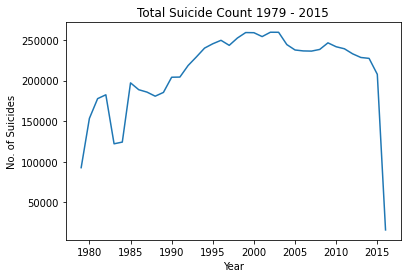

In [16]:
plt.title('Total Suicide Count 1979 - 2015')
plt.xlabel('Year')
plt.ylabel('No. of Suicides')
plt.plot(s1)
plt.show()

In [19]:
df.groupby(['year', 'sex'])['suicides_no'].sum()

year  sex   
1979  female     29418.0
      male       63372.0
1980  female     42629.0
      male      110771.0
1981  female     47448.0
Name: suicides_no, dtype: float64

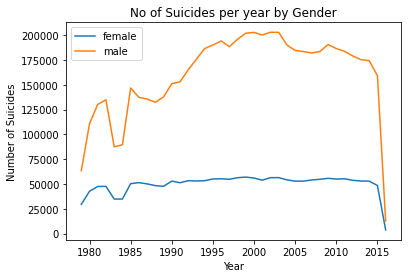

In [25]:
sns.lineplot(x=df.year, y = df.suicides_no, hue = df.sex, estimator=np.sum,ci=None)
plt.title('No of Suicides per year by Gender')
plt.ylabel('Number of Suicides')
plt.xlabel('Year')
plt.legend()
plt.show()

In [26]:
df.age.value_counts()

25-34 years    6010
5-14 years     6010
35-54 years    6010
55-74 years    6010
15-24 years    6010
75+ years      6010
Name: age, dtype: int64

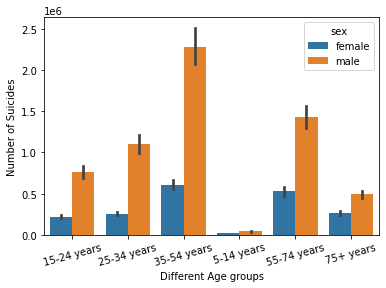

In [36]:
sns.barplot(x=df.age, y=df.suicides_no, hue=df.sex, estimator=np.sum)
plt.xticks(rotation='15')
plt.ylabel('Number of Suicides')
plt.xlabel('Different Age groups')
plt.show()

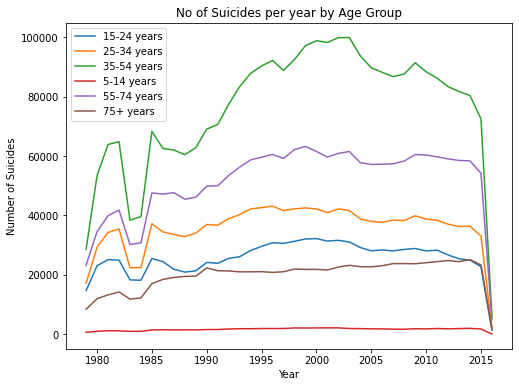

In [39]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.year, y = df.suicides_no, hue = df.age, estimator=np.sum,ci=None)
plt.title('No of Suicides per year by Age Group')
plt.ylabel('Number of Suicides')
plt.xlabel('Year')
plt.legend()
plt.show()

In [44]:
cou = df.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)

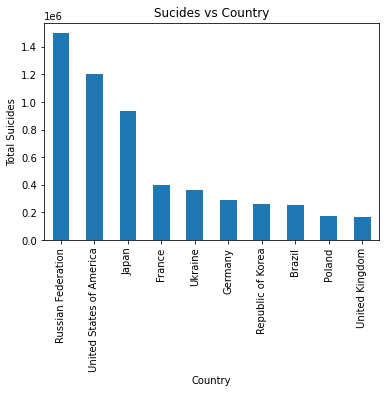

In [52]:
cou.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Suicides')
plt.title('Sucides vs Country')
plt.xticks(rotation=90)
plt.show()

In [53]:
df['percentage'] = round(df.suicides_no / df.population * 100 ,2)

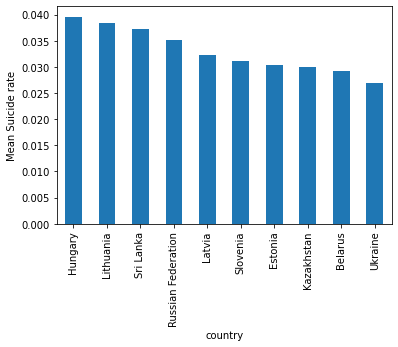

In [59]:
df.groupby('country')['percentage'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('country')
plt.ylabel('Mean Suicide rate')
plt.show()